# Inferencia Estadística
## Estimación de densidad no paramétrica (EDNP)
Víctor Muñiz. Septiembre 2020.

## Introducción.
  
Dada una secuencia de variables aleatorias independientes e identicamente distribuidas $x_1, x_2, \ldots x_n$ con función de densidad comúnn $f(x)$,
  
- ¿Cómo podemos estimar $f(x)$? 
  
  (Parzen, E. *On estimation of a Probability Density Function and Mode*, 1962)


**Un esquema tradicional de análisis de datos.**

Ejemplo: Estimación de la velocidad de la luz experimentalmente (Michaelson & Morley, 1986).

<img src="n1.png" height="40%" width="40%"/>

**Un esquema tradicional de análisis de datos.**

Ejemplo: Estimación de la velocidad de la luz experimentalmente (Michaelson & Morley, 1986).

<img src="n2.png" height="40%" width="40%"/>

- Estimamos su densidad

**Un esquema tradicional de análisis de datos.**

Ejemplo: Estimación de la velocidad de la luz experimentalmente (Michaelson & Morley, 1986).

<img src="n2.png" height="40%" width="40%"/>

- ¿Qué modelo es el adecuado? 
    - Esto dependerá de varios factores, por ejemplo, la naturaleza de los datos, el conocimiento apriori del fenómeno estudiado o la experiencia del analista.

**Un esquema tradicional de análisis de datos.**

Ejemplo: Estimación de la velocidad de la luz experimentalmente (Michaelson & Morley, 1986).

<img src="n3.png" height="40%" width="40%"/>

- Ajustemos un modelo normal, los parámetros $\theta=(\mu,\sigma)$ los estimamos de la muestra.

**Un esquema tradicional de análisis de datos.**

- Bajo éste esquema, todo el conocimiento que obtengamos del fenómeno bajo estudio proviene de **EL modelo** que escojamos, que a su vez nos proveé **LA función** de densidad de los datos.

- La modelación estadı́stica tradicional escoge algún modelo paramétrico conocido para $f(x)$, por ejemplo, Normal, Gamma, Exponencial, etc...

- Esto tiene mucho sentido para fenómenos muy estudiados y analizados (estudios de confiabilidad, por ejemplo) 

- Sin embargo, para fenómenos o datos más complejos, no siempre es conveniente o válido suponer una distribución de antemano. Verás muchos ejemplos más adelante.

## EDNP

En EDNP, no hacemos supuestos distribucionales sobre los datos.

Dado un conjunto de datos $\mathbf{X}\in \mathbb{R}^d$ (por simplicidad, empezaremos consideraremos el caso univariado):

\begin{equation*}
    \mathbf{x}=(x_1,x_2,\ldots,x_n)\sim f(\mathbf{x}),
\end{equation*}

queremos estimar **UNA** distribuci\'on de densidad $\hat{f}(\mathbf{x})$ que aproxime a $f(\mathbf{x})$ tal que

\begin{equation*}
    \hat{f}(\mathbf{x})\geq 0
\end{equation*}

\begin{equation*}
    \int_{\mathbb{R}} \hat{f}(\mathbf{x})d\mathbf{x}=1,
\end{equation*}

(*bona fide* density). 

¿Qué nos gustaría de $\hat{f}(\mathbf{x})$?

Que se parezcan: 

\begin{equation*}
    E\hat{f}(\mathbf{x})=f(\mathbf{x}).
\end{equation*}
    
Si $\hat{f}(\mathbf{x})$ es una estimaci\'on basada en una muestra de tamaño $n$, ésta característica nos asegura que
\begin{equation*}
    E\hat{f}(\mathbf{x}) \rightarrow f(\mathbf{x}) \text{ cuando } n\rightarrow \infty
\end{equation*}

(insesgado)

¿Qué nos gustaría de $\hat{f}(\mathbf{x})$?

Que converja a la vedadera distribución:

\begin{equation*}
    \hat{f}(\mathbf{x}) \overset{P}{\rightarrow} f(\mathbf{x})
\end{equation*}
    
(consistente)

Para esto, debemos definir una forma de medir la diferencia entre ambas distribuciones...

## El histograma

Es quizá el método no paramétrico más usado para estimar y visualizar una densidad. El método es muy simple.

Supongamos que $\mathbf{x}\in [a,b]$

- Crea una partición fija de $M$ celdas disjuntas $T_0, T_1,\ldots,T_{M-1}$ que comprendan el intervalo $[a,b]$, cada una con un ancho $h$.
- La densidad se estima mediante:
\begin{equation*}
  \hat{f}(x)=\displaystyle \frac{1}{nh}\sum_{m=0}^{M-1}N_mI_{T_m}(x),
\end{equation*}
    donde
     - $I_{T_m}$ es la función indicadora del intervalo $m$,
     - $N_m=\sum_{i=1}^n I_{T_m}(x_i)$, es decir, el número de valores que caen en la celda $T_m$

Las desventajas del histograma como un estimador de la densidad han sido mencionadas por varios autores. Por ejemplo:

- Celdas fijas
- Discontinuidades en las fronteras de las celdas
- Selección del origen del histograma

Ejemplo: 
NYC flights 2013. Registros de vuelos saliendo del aeropuerto de NYC (Hadley Wickham, 2018)

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

flights = pd.read_csv('complete_flights.csv', index_col=0)[['arr_delay', 'carrier', 'name']]
flights.dropna(inplace=True)
flights.head()

,arr_delay,carrier,name
0,11.0,UA,United Air Lines Inc.
1,20.0,UA,United Air Lines Inc.
2,33.0,AA,American Airlines Inc.
3,-18.0,B6,JetBlue Airways
4,-25.0,DL,Delta Air Lines Inc.


In [278]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, fixed

def select_values(array):
    unique = array.unique().tolist()
    unique.sort()
    return unique

def plot_hist(h_bins, h_range, aerolinea):
    data_flights = flights.loc[flights.name == aerolinea,'arr_delay'].to_numpy()
    num_bins = int((h_range[1]-h_range[0])/h_bins)
    plt.hist(data_flights, range = h_range, bins = num_bins, density = True, alpha=0.5, 
                     histtype='stepfilled', color='steelblue', edgecolor='none')    
    plt.title('Histograma')
    plt.show()

In [279]:
hist_bin = widgets.IntSlider(
    value=5,
    min=1,
    max=30,
    step=1,
    description='Bin (min)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

hist_range = widgets.IntRangeSlider(
    value=init_range,
    min=-60,
    max=180,
    step=5,
    description='Range (min)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
dropdown_name = widgets.Dropdown(options = select_values(flights.name))

In [280]:
interactive_plot = interactive(plot_hist, aerolinea = dropdown_name, h_bins = hist_bin, h_range = hist_range)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, description='Bin (min)', max=30, min=1), IntRangeSlider(value=(-60, 1…

## Estimación usando un kernel (KDE)

### KDE univariado

Es el método mas popular. Para el caso univariado, el KDE está dado por

\begin{equation*}
    \hat{f}(x)=\displaystyle \frac{1}{nh}\sum_{i=1}^n 
    K\left(\frac{x-x_i}{h}\right), \qquad x\in \mathbb{R}, h>0.
\end{equation*}

$K$ es la función Kernel, y $h$ es el **ancho de banda**, que determina la suavidad de la estimación.

Bajo condiciones no muy restrictivas ($h$ debe decrecer cuando $n$ aumenta), puede mostrarse que KDE converge en probabilidad a la verdadera densidad.

<img src="kde1.png" height="65%" width="65%"/>

Dado un kernel K y un ancho de banda h, la KDE es *única* para un conjunto de datos especı́fico, entonces, **no depende** de la selección del origen, como pasa con los histogramas.

**El Kernel $K$**

- Puede ser una función de densidad también, generalmente se selecciona una función unimodal y simétrica.
- El centro del kernel se coloca sobre cada dato $x_i$
- La influencia de cada dato se propaga en su vecindad
- La contribución de cada punto se suma para la estimación total

Kernels generalmente usados (python, R)

In [281]:
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

Text(0.5, 1.0, 'Available Kernels')

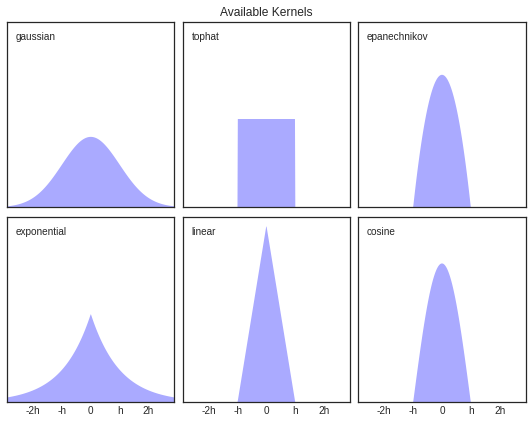

In [300]:
fig, ax = plt.subplots(2, 3, figsize=(8, 7), sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)
    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())
    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

Más importante que el Kernel, es la elección del ancho de banda.

**El ancho de banda $h$**

- Es un factor de escala
- Controla la suavidad o rugosidad de la estimación
- Introducimos un concepto importante: sobreestimación (o sobreajuste)
- Esto a su vez, lleva a otro concepto aún mas importante: *Bias-Variance tradeoff*

¿Cómo elegimos $h$?

- A “ojo” (¿qué quieres ver?)

In [283]:
from sklearn.neighbors import KernelDensity

def plot_kde1(h_bins, h_range, aerolinea, kern, h):
    data_flights = flights.loc[flights.name == aerolinea,'arr_delay'].to_numpy()
    
    x_grid = np.linspace(-60, 180, 5000)[:, np.newaxis]    
    kde = KernelDensity(bandwidth=h, kernel=kern)
    kde.fit(data_flights[:, np.newaxis])
    pdf = np.exp(kde.score_samples(x_grid))
       
    fig, ax = plt.subplots(figsize=(5, 4), subplot_kw={'facecolor':'#EEEEEE','axisbelow':True})
    num_bins = int((h_range[1]-h_range[0])/h_bins)    
    ax.hist(data_flights, range = h_range, bins = num_bins, density = True, alpha=0.5, 
                     histtype='stepfilled', color='steelblue', edgecolor='none')
    ax.plot(x_grid, pdf, '-k', lw=2, alpha=0.5)    
            
    return fig

In [284]:
hist_bin = widgets.IntSlider(
    value=5,
    min=1,
    max=30,
    step=1,
    description='Bin (min)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

hist_range = widgets.IntRangeSlider(
    value=init_range,
    min=-60,
    max=180,
    step=5,
    description='Range (min)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [285]:
kernel_h = widgets.FloatSlider(
    value= 0.6,
    min= 0.2,
    max= 20,
    step= 0.2,
    description='bandwidth',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

dropdown_name = widgets.Dropdown(options = select_values(flights.name))

dropdown_kernel = widgets.Dropdown(options = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 
                                              'linear', 'cosine'], value = 'gaussian', description='Kernel:')

In [286]:
interactive_plot = interactive(plot_kde1, aerolinea = dropdown_name, h_bins = hist_bin, h_range = hist_range,
                              kern = dropdown_kernel, h = kernel_h)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5, continuous_update=False, description='Bin (min)', max=30, min=1), Int…

¿Cómo elegimos $h$?

- A “ojo” (¿qué quieres ver?)
- Dos criterios:
    - Normal scale rule (también conocida como “rule of thumb”)
    - Validación cruzada (CV)

Criterios para elegir $h$

- Mean Square Error (MSE)
- Integrated Squared Error (ISE)
- Mean Integrated Squared Error (MISE)

Criterios para elegir $h$

- Normal scale rule (también conocida como “rule of thumb”)
    - Asume que $f$ es Normal, y calcula $h$ óptima que minimice MISE según este supuesto.
    - Puede mostrarse que, si usamos un kernel Gaussiano, el $h$ óptimo bajo este esquema es $ h^{ROT}=1.06 s n^{-1/5}$, con $s$ es la estimaci\'on de $\sigma$.
    - La opción por default en la mayoría de softwares
    - Bien para un primer vistazo, pero tiende a suavizar de mas cuando $f$ es multimodal o claramente no-Gaussiana.
- Validación cruzada: utiliza el criterio *leave-one-out* CV.

### KDE multivariado

La extensi\'on al caso multivariado es sencilla:

  \begin{equation*}
    \displaystyle \hat{f}_\mathbf{H}(\mathbf{x})=\frac{1}{n|\mathbf{H}|}\sum_{i=1}^n K(\mathbf{H}^{-1}
    (\mathbf{x} - \mathbf{x}_i)), \quad \quad \mathbf{x}\in \mathbb{R}^d,
  \end{equation*}
  
donde $\mathbf{H}$ es una matriz de $d\times d$ no singular que generaliza el ancho de banda $h$, y $K$ es una función con media $\mathbf{0}$ e integra 1.

Ejemplo. Datos simulados.

In [287]:
def kde2D(x, y, h):
    xy = np.vstack([x,y])
    d = xy.shape[0]
    n = xy.shape[1]
    # utilizo el kernel Gaussiano 
    kde = KernelDensity(bandwidth=h, metric='euclidean', kernel='gaussian', algorithm='ball_tree')
    kde.fit(xy.T)
    
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    fig, ax = plt.subplots(figsize=(6, 6))
    #ax.imshow(np.rot90(Z), cmap=plt.cm.viridis, extent=[xmin, xmax, ymin, ymax])
    ax.pcolormesh(xx, yy, Z, shading = 'auto', cmap=plt.cm.viridis)
    ax.scatter(x, y, s=2, facecolor = 'white') #, edgecolor='')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('KDE')
    ax.set_xlim((-3,3))
    ax.set_ylim((-3,3))
    
    return fig

In [288]:
# el parámetro en un slider
kernel_h = widgets.FloatSlider(
    value= 0.2,
    min= 0.01,
    max= 3,
    step= 0.01,
    description='bandwidth',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

In [289]:
# Genero algunos datos en 2 dimensiones
N1 = np.random.normal(size=500)
N2 = np.random.normal(scale=0.5, size=500)
x = N1+N2
y = N1-N2

interactive_plot = interactive(kde2D, x=fixed(x), y=fixed(y), h=kernel_h)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='bandwidth', max=3.0, min=0.…

### KDE como un modelo generativo

In [290]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()
data = digits.data

Los datos reales (digitos en tamaño 8 x 8 pixeles)

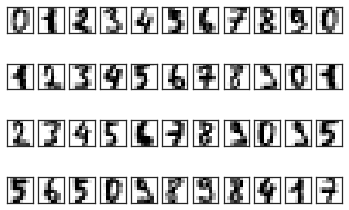

In [291]:
real_data = digits.data[:44].reshape((4, 11, -1))
# plot real digits and resampled digits
fig, ax = plt.subplots(4, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)


In [297]:
def kde_digits(data, bw):
    kde = KernelDensity(bandwidth=bw)
    kde.fit(data)
    # sample 44 new points from the data
    new_data = kde.sample(44, random_state=0)
    
    new_data = new_data.reshape((4, 11, -1))
    fig, ax = plt.subplots(4, 11, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(11):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)

    ax[0, 5].set_title('"New" digits drawn from the kernel density model')
    
    return fig
    #plt.show()

In [298]:
kernel_h = widgets.FloatSlider(
    value= 10,
    min= 0.1,
    max= 15,
    step= 0.5,
    description='bandwidth',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)


In [299]:
interactive_plot = interactive(kde_digits, data=fixed(data), bw=kernel_h)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='bandwidth', max=15.0, min=…

Usando validación cruzada para encontrar el $h$ óptimo

In [295]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# muestrea 44 nuevos digitos 
new_data = kde.sample(44, random_state=0)
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

best bandwidth: 1.8329807108324356


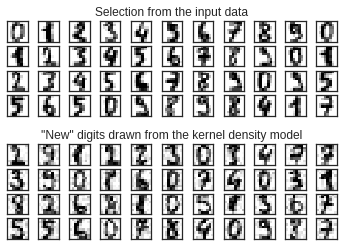

In [296]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()